# 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA


載入 相關套件 並 執行 PCA 實驗 ...

##### References :  
- Principal Component Analysis  
   http://setosa.io/ev/principal-component-analysis/  
- A step by step explanation of Principal Component Analysis  
   https://towardsdatascience.com/a-step-by-step-explanation-of-principal-component-analysis-b836fb9c97e2  
- 淺談降維方法中的 PCA 與 t-SNE  
   https://medium.com/d-d-mag/淺談兩種降維方法-pca-與-t-sne-d4254916925b  
- scikit-learn中PCA的使用方法  
   https://blog.csdn.net/u012162613/article/details/42192293  

In [1]:
from sklearn import datasets

import numpy as np

# K-Means, Hierarchical Clustering(階層分群)
from sklearn.cluster import KMeans, AgglomerativeClustering
# Principal Components Analysis(主成份分析)
from sklearn import decomposition


import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
digits = datasets.load_digits( n_class = 3 )
X = digits.data
y = digits.target

### PCA 參數說明：

PCA = decomposition.PCA( n_components )
- n_components：保留特徵值的個數 


Reference : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [3]:
PCA = decomposition.PCA( n_components = 3 )
PCA.fit( X )
X = PCA.transform(X)

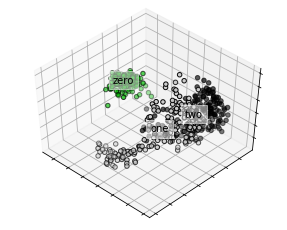

In [4]:
centers = [ [ 1, 1 ], [ -1, -1 ], [ 1, -1 ] ]

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()


for name, label in [('zero', 0), ('one', 1), ('two', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()
